# Problem-solving notebook

### Exercise: combinations of first and last names

Given the following list of first and last names, write a nested Python loop to print every combination of first and last name.

In [1]:
first=['Xue', 'Mary', 'Robert']
last=['Li', 'Smith', 'Dixon']

The first step is to understand the problem, so let's figure out what the output looks like:

```
Xue Li
Xue Smith
Xue Dixon
Mary Li
Mary Smith
Mary Dixon
Robert Li
Robert Smith
Robert Dixon
```

If we were trying to do this for two arbitrary lists, we should think about the edge cases, such as when one or both of the lists are empty.  Let's assume that we fully understand the problem now.

The next step is to try to solve the problem, which we must be able to manually. Unless you are an experienced programmer, it's best not to think about coding at this point. I literally think about moving my fingers or data around. In this case, I use a finger on each list and then for every top pointer finger I move my finger through all of the bottom fingers:

<img src="images/first-last.png" width="200">

When you hear the "all combinations" pattern, think of nested loops.  Moving a finger through a list also screams loop! Here's one possible imitation:

In [2]:
for f in first:
    for l in last:
        print(f+' '+l)

Xue Li
Xue Smith
Xue Dixon
Mary Li
Mary Smith
Mary Dixon
Robert Li
Robert Smith
Robert Dixon


How would you solve this with a list comprehension (to get a list of instead of printing all combinations)?

In [3]:
[f+' '+l for f in first for l in last]

['Xue Li',
 'Xue Smith',
 'Xue Dixon',
 'Mary Li',
 'Mary Smith',
 'Mary Dixon',
 'Robert Li',
 'Robert Smith',
 'Robert Dixon']

### Exercise: checking for valid parentheses

Let's try to solve a problem from leetcode.com called
[Valid Parentheses](https://leetcode.com/problems/valid-parentheses/).  That website has lots and lots of sample problems to solve and will help you get better at programming, and is very useful when you  start practicing for interviews.  The problem description is (taken verbatim from the site):

*Given a string s containing just the characters '(', ')', '{', '}', '[' and ']', determine if the input string is valid.*

*An input string is valid if:*

1. *Open brackets must be closed by the same type of brackets.*
2. *Open brackets must be closed in the correct order.*

Per our process, we have to understand the problem and my first question involves the set of valid characters. Looking more closely at the problem description, I see that only `()[]{}` characters are allowed. Now, let's come up with a bunch of examples that illustrate the goal:

<table>
    <tr>
        <th>Input</th><th>Valid</th>
    </tr>
    <tr><td>()</td><td>true</td></tr>
    <tr><td>[]</td><td>true</td></tr>
    <tr><td>{}</td><td>true</td></tr>
    <tr><td>()[]</td><td>true</td></tr>
    <tr><td>([])</td><td>true</td></tr>
    <tr><td>{({})}</td><td>true</td></tr>
    <tr><td>{)</td><td>false</td></tr>
    <tr><td>{})</td><td>false</td></tr>
    <tr><td>{()</td><td>false</td></tr>
    <tr><td>(</td><td>false</td></tr>
    </table>
    
If I did this manually, I would move my finger down the list of characters and perform an operation that made sure that closing symbols come in the right order and that all groupings are closed at the end:

<img src="images/count-parens.png" width="80">

#### First attempt

My first thought was to increment in decrement account for each kind of grouping. As I encountered an opening symbol, I would bump that count. As I encountered a closing symbol, I would decrement that count. After walking through the entire string, the counts should all be zero indicating nothing is still open. This doesn't work. Why not?

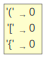

In [4]:
from lolviz import *
objviz({'(':0,'[':0,'{':0})  # a first attempt at tracking

Let's see what happens with a bad example: `([)`. When we get to the `)`, the counts are

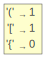

In [5]:
objviz({'(':1,'[':1,'{':0})  # a first attempt at tracking

We need to drop the count of the `)` but how do we know that it is in the right order? We don't. 

#### The right approach

It's not just the character count that matters, but the sequence of open and closes. When we see a close character, the most recent opening character must be the associated grouping symbol. Because these groupings can be nested, it complicates matters. We need a way to track the opening characters we've seen before and in their order of appearance.  Since I know that the solution requires a [stack data structure](https://docs.python.org/3/tutorial/datastructures.html#using-lists-as-stacks) for tracking symbols, I'm going to draw it as such:

<img src="images/stack-parens.png" width="120">

At this point, we see the first closing symbol and so we compare the closing symbol with the top of the stack to see if it's the most recently opened grouping. It is, so we pop off the `(` from the stack and move to the next character with her finger.

Take a look at the situation when our finger moves to the `}`. We can see that there is a clear mismatch between the closing character under the finger and what we are expecting, thanks to the stack of open grouping symbols.
 
<img src="images/stack-parens-2.png" width="120">

Now that we have a working process, we can think about actually implementing it.  I will play around with some code to make sure I can make it work and then worry about putting it into a nice function. This is a typical workflow for programmers. Explore then cleanup.

In [6]:
symbols = [] # our stack of symbols
openers = {')':'(', ']':'[', '}':'{'}
s = ")]}"
for c in s:
    if c in "([{":
        symbols.append(c)
    else: # verify we have the right opening symbol
        if len(symbols)==0:
            print(f"Char '{c}' doesn't have an opening char; symbols={','.join(symbols)}")
            continue
        opener = symbols.pop()
        if openers[c] != opener:
            print(f"mismatched '{c}' doesn't match '{opener}'; symbols={','.join(symbols)}")
if len(symbols)>0:
    print(f"Unclosed groupings: {symbols}")

Char ')' doesn't have an opening char; symbols=
Char ']' doesn't have an opening char; symbols=
Char '}' doesn't have an opening char; symbols=


After trying various input strings, I added a number of messages to catch errors. Now we can create a clean function that returns true or false as to whether the groupings are balanced:

In [7]:
def isValid(s: str) -> bool:
    symbols = [] # our stack of symbols
    openers = {')':'(', ']':'[', '}':'{'}
    for c in s:
        if c in "([{":
            symbols.append(c)
        else: # verify we have the right opening symbol
            if len(symbols)==0:
                return False
            opener = symbols.pop()
            if openers[c] != opener:
                return False
    if len(symbols)>0:
        return False
    return True

We have to try the function out with a bunch of test cases to make sure it works, including some edge cases:

In [8]:
isValid('')

True

In [9]:
isValid('()')

True

In [10]:
isValid('{()')

False

In [11]:
isValid('(]')

False

In [12]:
isValid('{[()]}')

True

In [13]:
isValid('()[]{}')

True

In [14]:
isValid('(')

False

Submitting to leetcode indicates that the runtime is faster than 85% of submitted solutions.

### Exercise: determining which ad to show on a website

Imagine you work for a company that has a website and you'd like to be able to show ads on the various webpages on the website.  Customers that want to purchase ads by a certain fraction of the ad "impressions".  For example, company X might buy 30%, company Y 60%, and company Z 10% of the ad space. Your job is to randomly show the company's ads, but in the correct proportions.

To solve this problem, but it helps to visualize the relationship between the companies; we might draw a bar chart on paper that looks like this:

In [15]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'  # gets sharper images

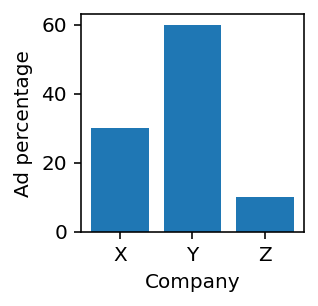

In [16]:
plt.figure(figsize=(2,2))
plt.bar(["X","Y","Z"],[30,60,10])
plt.xlabel("Company")
plt.ylabel("Ad percentage")
plt.show()

We need to roll some random computer dice with three sides that are biased in this way. Another way to look at this as throwing darts at the wall and having most of the darts end up in the Y column, 30% in the X column, etc... Without altering gravity, that's hard to do. An easier way is to stretch things out so that the width of each company's region is proportional to its percentage, which then flattens out the heights of the bars:

<!-- this doesn't work for some reason
<img src="images/ads-regions.png" width="200">
-->

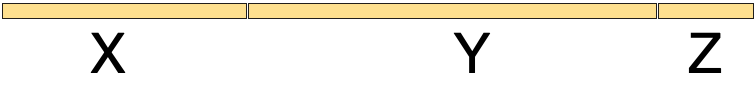

In [17]:
from IPython.display import Image
Image(filename='images/ads-regions.png', width=300)

If we throw darts at this overall region, X will get 30%, Y will get 60%, and Z will get 10%. So this tells us an approach: pick a uniform random number and figure out which region it falls in and report that company's ad.

So now we know how to solve it, let's code it up. Obviously we have some research to do because we need to figure out how to get a random number. There are a number of ways, but let's use numpy:

In [18]:
import numpy as np

np.random.random(), np.random.random(), np.random.random()

(0.08599568423657733, 0.0995368831141007, 0.028752754822220505)

Let's make a function that returns a company name with every call. To keep things simple, let's do it for the fixed three companies we've been talking about:

In [19]:
def select(companies):
    i = np.random.random() # throw a dart
    if i>=0 and i<.30:
        return companies[0]
    if i>=.30 and i<.90:
        return companies[1]
    return companies[2]

In [20]:
ads = [select(companies=["X","Y","Z"]) for i in range(1000)]
ads[:15]

['X', 'Y', 'Y', 'X', 'X', 'Z', 'Y', 'Y', 'Y', 'Y', 'X', 'X', 'Y', 'Y', 'Y']

As part of our problem-solving strategy, we also need to verify things, so let's do a histogram to verify the percentages look right:

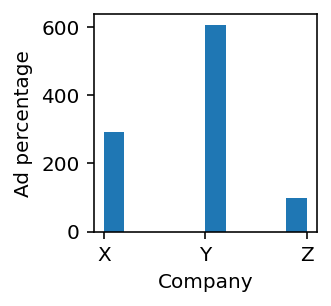

In [21]:
plt.figure(figsize=(2,2))
plt.hist(ads)
plt.xlabel("Company")
plt.ylabel("Ad percentage")
plt.show()

### Exercise: computing histograms

In the previous exercise, we used the histogram functionality of the plotting library to compute the number of X, Y, and Z company values in the `ads` list. Now, let's figure out a way to efficiently keep a count for the company names in the list, without relying on built-in functionality.  To make it more interesting, we're opening up to more than just the three companies.

In [22]:
companies=["Google","Apple","FaceBook","HP","SAP"]
n = len(companies)

As a subexercise, how would we get a uniform random sample of 5000 company names from this list? To get you familiar with the vector-based approach of numpy, let's ask for a list of integer indexes into the company's list of size 5000. The index values should be integers and in the range `[0,n)`:

In [23]:
idxs = np.random.randint(low=0,high=n,size=5000)
idxs[0:50]

array([0, 1, 1, 4, 0, 1, 4, 0, 2, 2, 4, 2, 3, 3, 1, 2, 2, 3, 1, 2, 1, 1,
       4, 2, 3, 0, 2, 2, 2, 1, 3, 3, 3, 4, 3, 0, 4, 0, 0, 4, 3, 1, 0, 0,
       1, 3, 3, 3, 3, 4])

Let's also convert the list to a numpy array, which then allows us to use a list of integers as an index:

In [24]:
companies = np.array(companies)
names = companies[idxs]
names[0:15]

array(['Google', 'Apple', 'Apple', 'SAP', 'Google', 'Apple', 'SAP',
       'Google', 'FaceBook', 'FaceBook', 'SAP', 'FaceBook', 'HP', 'HP',
       'Apple'], dtype='<U8')

We could also do this with a list comprehension in pure Python, but it's a good idea to get familiar with numpy.

Ok, now we have a list of companies and would like to count the number of occurrences of each. If we wanted to use numpy, we could do the following:

In [25]:
np.unique(names, return_counts=True)

(array(['Apple', 'FaceBook', 'Google', 'HP', 'SAP'], dtype='<U8'),
 array([ 943,  952, 1017, 1068, 1020]))

Instead, we want to implement this ourselves.   We are given a list of company names with multiple occurrences of each.  To solve this, we don't think about code and think about how we would do this by hand. The first thing I would do is to create a table with a company name and account to the right, something like this:

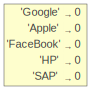

In [26]:
from lolviz import *
objviz({c:0 for c in companies})

Then, I would move my finger down the list of company names and the count in my table for the company pointed to by my finger:

<img src="images/companies.png" width="400">

That sounds like a good approach and therefore we can code this up.  Every time I think of moving my finger down a list, I think of a for loop of some kind.   When I think of a table mapping company name to account, I think of a dictionary.

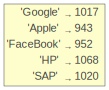

In [27]:
counts = {c:0 for c in companies}
for name in names:
    counts[name] += 1
objviz(counts)

We would expect the numbers to be roughly the same, which they are. If we increase the sample size to 10,000, the counts would be even closer.

### Exercise: encrypting text

In this exercise, let's learn a little bit about security and encryption by implementing a [cipher encryption function](https://en.wikipedia.org/wiki/Cipher). Given a string, the function must return an encrypted version and the key (the key is the reverse mapping of the cipher and is needed to decrypt). The cipher is a dictionary the maps character to a new character. A cipher encryption works by replacing each character in the plaintext with a character from a key.  For example, if we have the following partial key, we'd encrypt `cat` as `nsz` and `taca` as `zsns`.

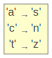

In [28]:
objviz({'a':'s', 'c':'n', 't':'z'})

Starting the design process at the highest level, it seems like we have two steps:
 
1. create a cipher that maps all lowercase letters to a random unique character; create the key by reversing the cipher
2. create a new string by walking the original and replacing each character with the character from the key

Step one is nontrivial, so we need to break that process down into some smaller chunks. Working backwards, the problem is straightforward if we have a list of characters a..z and a shuffled version of a..z.  If that's the case, we can simply move a finger through the a..z and the shuffled version, combining them into a dictionary.  To get a list of a..z, I happen to know we can get it easily from Python in `string.ascii_lowercase` so let's not worry about that. How do we get a shuffled version? There are a number of solutions using list comprehensions but it's easier if we use a built-in shuffling function in numpy.  Given a vector/list of elements, `np.random.shuffle()` will shuffle them up in place (meaning it will alter the list to pass and instead of creating a new one and returning it).

In [29]:
import string
import numpy as np

vocab = string.ascii_lowercase + ' ' # allow spaces as well
shuffled_chars = list(vocab)
np.random.shuffle( shuffled_chars )

Once we have the shuffled list, use zip() and a dictionary comprehension to glue them together. (A dictionary comprehension is the same as a list comprehension except you get a dictionary instead of a list.)

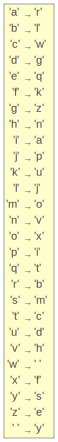

In [30]:
cipher = {c:k for c,k in zip(vocab,shuffled_chars)}
objviz(cipher)

The key is the reverse of the cipher so let's just walk that dictionary and flip the key and value:

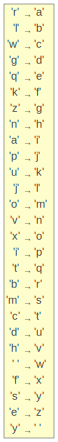

In [31]:
key = {v:k for k,v in cipher.items()}
objviz(key)

That completes the first step. For the second step, we have to create a new string from the original plaintext based on the cipher. That's a matter of walking the characters, looking them up in the cipher, and adding the translated character to a new string.

In [32]:
s = "my password is dogcatbanana"
e = ""
for c in s:
    e += cipher[c]
# same as: e = ''.join([cipher[c] for c in s])
e

'osyirmm xbgyamygxzwrclrvrvr'

To go backwards to the plaintext:

In [33]:
s = ''.join([key[c] for c in e])
s

'my password is dogcatbanana'

That appears to work so let's create two clean functions:

In [34]:
def encrypt(s) -> (dict,dict):
    vocab = string.ascii_lowercase + ' ' # allow spaces as well
    shuffled_chars = list(vocab)
    np.random.shuffle( shuffled_chars )
    cipher = {c:k for c,k in zip(vocab,shuffled_chars)}
    key = {v:k for k,v in cipher.items()}
    e = ''.join([cipher[c] for c in s])
    return e, key

def decrypt(e, key) -> str:
    return ''.join([key[c] for c in e])

Let's give it a try with some sample strings:

In [35]:
e,key = encrypt("hi mom")
decrypt(e,key)

'hi mom'

In [36]:
e,key = encrypt("")
decrypt(e,key)

''

In [37]:
e,key = encrypt("apple cat banana")
decrypt(e,key)

'apple cat banana'

Here's a cool Python syntax trick.  If you have a tuple `t`, then `*t` unpacks that into an argument list and a function call, which lets us tighten up the syntax like this:

In [38]:
decrypt( *encrypt("apple cat banana") )

'apple cat banana'

In [39]:
decrypt( *encrypt("i like toast") )

'i like toast'

This encryption seems great! How could somebody guess our randomized mapping of characters? Unfortunately, these simple ciphers fall immediately to character frequency analysis, as long as we have enough characters in the sample to get an accurate picture of character frequencies. For example, in English the letter `e` has the highest frequency so we replace the character with the highest frequency in the encrypted text with `e` and so on down the frequency list.  As we go along, we look for words in English dictionary or sequences that are close to endless words.  It's like a game of Jeopardy where we try to guess a phrase given some of the characters. We can also look at most common word pairs like `th` to tease out the original plaintext. If you'd like to read a fascinating and well-written (nonacademic) book on cryptography from ancient times to modern times, check out [The Code Book](https://www.amazon.com/Code-Book-Science-Secrecy-Cryptography/dp/0385495323) by Simon Singh. 

### Exercise: Download and filter CSV data from the web

As we will see in the data acquisitions class, a very common pattern is to collect some data from the web and process it in some way.  Let's get started  by downloading a CSV file from the web that contains information on [cities in various states](https://people.sc.fsu.edu/~jburkardt/data/csv/cities.csv) from the US. We could simply download that file onto our local disk, but let's do this automatically with a program. 

The next step is to filter out any cities that are not in Washington state, code `WA`.   Let's finish up by saving those `WA` rows back to a text file, `/tmp/wa_cities.csv`, in CSV format. We'll avoid using pandas initially and then do it again with pandas.

To get started, think about the overall sequence of steps needed to solve this problem at a high level; totally ignore the coding issues. In my mind, there are three things to do:

1. Download the CSV file as a string
2. Filter for just the `WA` states
3. Write those rows to a new text file

There are a number of details we need to flesh out for each step, but it's important to start at a high level before drilling down into the details.

For step one, a quick Google search reveals that there is a package called `requests` for Python that allows us to download files easily so let's do that and take a look at what we get:

In [40]:
import requests
r = requests.get("https://people.sc.fsu.edu/~jburkardt/data/csv/cities.csv")
contents = r.text
print(contents[0:300])

"LatD", "LatM", "LatS", "NS", "LonD", "LonM", "LonS", "EW", "City", "State"
   41,    5,   59, "N",     80,   39,    0, "W", "Youngstown", OH
   42,   52,   48, "N",     97,   23,   23, "W", "Yankton", SD
   46,   35,   59, "N",    120,   30,   36, "W", "Yakima", WA
   42,   16,   12, "N",     71,  


There are a lot of quotation marks in there that are unnecessary and we can remove.  We did not know this detail when planning the overall process, but now we know and so let's clean up:

In [41]:
contents = contents.replace('"', '')
print(contents[0:300])

LatD, LatM, LatS, NS, LonD, LonM, LonS, EW, City, State
   41,    5,   59, N,     80,   39,    0, W, Youngstown, OH
   42,   52,   48, N,     97,   23,   23, W, Yankton, SD
   46,   35,   59, N,    120,   30,   36, W, Yakima, WA
   42,   16,   12, N,     71,   48,    0, W, Worcester, MA
   43,   37,


For step two, we need to filter for just those cities in Washington state but right now all we have is a string. Let's split that string into a list of strings, with one row per string and separate out the first row as the list of columns:

In [42]:
lines = contents.split('\n')
columns = lines[0]
lines = lines[1:]
lines[:5]

['   41,    5,   59, N,     80,   39,    0, W, Youngstown, OH',
 '   42,   52,   48, N,     97,   23,   23, W, Yankton, SD',
 '   46,   35,   59, N,    120,   30,   36, W, Yakima, WA',
 '   42,   16,   12, N,     71,   48,    0, W, Worcester, MA',
 '   43,   37,   48, N,     89,   46,   11, W, Wisconsin Dells, WI']

Once we have that list, we can use a list comprehension to filter the rows. Note that we don't have to split up the individual rows into fields or columns because a simple check for string `WA` in each row is sufficient:

In [43]:
wa = [row for row in lines if 'WA' in row]
wa

['   46,   35,   59, N,    120,   30,   36, W, Yakima, WA',
 '   47,   25,   11, N,    120,   19,   11, W, Wenatchee, WA',
 '   46,    4,   11, N,    118,   19,   48, W, Walla Walla, WA',
 '   47,   14,   24, N,    122,   25,   48, W, Tacoma, WA',
 '   47,   40,   11, N,    117,   24,   36, W, Spokane, WA',
 '   47,   35,   59, N,    122,   19,   48, W, Seattle, WA']

For step three, we can open up a text file as we normally do and iterate through the rows of data (starting out by writing the list of columns):

In [44]:
with open("/tmp/wa_cities.csv", "w") as f:
    f.write(columns+"\n")
    for row in wa:
        f.write(row+"\n")

#### Pandas alternative

Pandas is also network aware and so we can give it a URL instead of a file name to read in a CSV file, which it processes heavily into a table rather than a simple list of strings as we did previously

In [45]:
import pandas as pd
import csv
df = pd.read_csv("https://people.sc.fsu.edu/~jburkardt/data/csv/cities.csv",
                 delim_whitespace=True)
df.head(5)

,"LatD,","LatM,","LatS,","NS,","LonD,","LonM,","LonS,","EW,","City,",State
0,"41,","5,","59,","N,","80,","39,","0,","W,","Youngstown,",OH
1,"42,","52,","48,","N,","97,","23,","23,","W,","Yankton,",SD
2,"46,","35,","59,","N,","120,","30,","36,","W,","Yakima,",WA
3,"42,","16,","12,","N,","71,","48,","0,","W,","Worcester,",MA
4,"43,","37,","48,","N,","89,","46,","11,","W,","Wisconsin Dells,",WI


For step two, it's easy to filter using a query like syntax.  Expression `df['State']=='WA'` gives us a vector of Boolean values indicating whether a row satisfies the conditions:

In [46]:
df['State']=='WA'

0      False
1      False
2       True
3      False
4      False
       ...  
123    False
124    False
125    False
126    False
127    False
Name: State, Length: 128, dtype: bool

That vector of Booleans is usable as an index into the rows of the data frame:

In [47]:
df_wa = df[df['State']=='WA']
df_wa

,"LatD,","LatM,","LatS,","NS,","LonD,","LonM,","LonS,","EW,","City,",State
2,"46,","35,","59,","N,","120,","30,","36,","W,","Yakima,",WA
17,"47,","25,","11,","N,","120,","19,","11,","W,","Wenatchee,",WA
28,"46,","4,","11,","N,","118,","19,","48,","W,","Walla Walla,",WA
54,"47,","14,","24,","N,","122,","25,","48,","W,","Tacoma,",WA
68,"47,","40,","11,","N,","117,","24,","36,","W,","Spokane,",WA
78,"47,","35,","59,","N,","122,","19,","48,","W,","Seattle,",WA


Step three is also much easier using pandas:

In [48]:
df_wa.to_csv("/tmp/wa_cities2.csv", index=False)

The final phase of our problem-solving template is to verify results, which we can do by comparing the two files we wrote to make sure they are the same.  Here I'm using the `diff` tool from the commandline; getting no output indicates there are no differences, which is what we want.

In [49]:
! diff /tmp/wa_cities*.csv 

1,7c1,7
< LatD, LatM, LatS, NS, LonD, LonM, LonS, EW, City, State
<    46,   35,   59, N,    120,   30,   36, W, Yakima, WA
<    47,   25,   11, N,    120,   19,   11, W, Wenatchee, WA
<    46,    4,   11, N,    118,   19,   48, W, Walla Walla, WA
<    47,   14,   24, N,    122,   25,   48, W, Tacoma, WA
<    47,   40,   11, N,    117,   24,   36, W, Spokane, WA
<    47,   35,   59, N,    122,   19,   48, W, Seattle, WA
---
> "LatD,","LatM,","LatS,","NS,","LonD,","LonM,","LonS,","EW,","City,",State
> "46,","35,","59,","N,","120,","30,","36,","W,","Yakima,",WA
> "47,","25,","11,","N,","120,","19,","11,","W,","Wenatchee,",WA
> "46,","4,","11,","N,","118,","19,","48,","W,","Walla Walla,",WA
> "47,","14,","24,","N,","122,","25,","48,","W,","Tacoma,",WA
> "47,","40,","11,","N,","117,","24,","36,","W,","Spokane,",WA
> "47,","35,","59,","N,","122,","19,","48,","W,","Seattle,",WA


### Exercise: simple EDA of the text corpus

The goal of this exercise is to load all of the text files in a directory and compute an overall vocabulary and count per word. This would be the first step in understanding a corpus of text we wanted to analyze. For example, what is the most common word used in English?  It's almost certainly `the`, right? Another interesting question is the length of the average word and the size of the overall vocabulary.
 
Took a look at the [Berlitz](https://github.com/parrt/msds501/tree/master/data/berlitz1) data directory that's part of this course is repository. You will see a series of text files. Here's a terminal command to find all files that have the word Israel and the name:

In [50]:
! ls ../data/berlitz1/*Israel*

../data/berlitz1/HandRIsrael.txt   ../data/berlitz1/WhatToIsrael.txt
../data/berlitz1/HistoryIsrael.txt ../data/berlitz1/WhereToIsrael.txt
../data/berlitz1/IntroIsrael.txt


The overall steps needed to solve this problem are something like:

1.  Get a list of all files in a directory
2.  Walked a list of files and extract to the text, appending it to an overall string
3.  Normalize the contents string by converting to lowercase and calling `split()` to break up the string into a list of words
4.  Report the total number of words, number of unique words, average word length, and perhaps the top 20 most common words

A bit of googling will lead you to `os.listdir()` for step 1 and step number 2 is just a for-each loop over that list that uses the "fetch file contents" pattern we've seen before. Using the `+` operator, we can add strings to an overall `contents` variable. Step 3 is just to function calls to `lower()` and `split()`. Depending on our knowledge of available libraries, step 4 could be a lot of work or it very simple; let's code the other parts first.

In [51]:
import os

contents = ""
for filename in os.listdir("../data/berlitz1"):
    with open(f"../data/berlitz1/{filename}", "r") as f:
        s = f.read()
        contents += " " # add space so words don't get stuck together
        contents += s
contents = contents.lower()
words = contents.split()
print(f"There are {len(words)} words in the contents")

There are 520878 words in the contents


To get the unique words, we can either use numpy or `set(...)`. It looks like there are 57,894 words in the vocabulary:

In [52]:
len(np.unique(words)), len(set(words))

(57894, 57894)

Let's work backwards: To compute the average word length, we need a list of the word lengths and can then just compute the mean using numpy.  To get the word lengths, we can use a list comprehension to walk through the words. The code then looks like this:

In [53]:
avg_len = np.mean([len(w) for w in words])
avg_len

5.0362503311715985

Finally, we need to count the number of occurrences of the words, kind of like we did for the histogram exercise above. Since you know how to do that with your own code now, let's learn to use a built-in `Counter` object that does all the work for us:

In [54]:
from collections import Counter

ctr = Counter(words)
c = ctr.most_common(20)
c

[('the', 45163),
 ('of', 20438),
 ('and', 16739),
 ('a', 11830),
 ('in', 10670),
 ('to', 10473),
 ('is', 6845),
 ('for', 4282),
 ('on', 3909),
 ('with', 3762),
 ('from', 3604),
 ('by', 3263),
 ('are', 3190),
 ('as', 3104),
 ('at', 2884),
 ('was', 2686),
 ('its', 2539),
 ('it', 2499),
 ('you', 2406),
 ('that', 2146)]

The solution to this problem is not too hard given all of the libraries we have available to us.

Let's also plot the counts to see the relationship between frequencies and just how fast it drops off.

In [55]:
c = np.array(c)
wds = c[:,0]
counts = c[:,1].astype(int)  # numpy converted c to strings

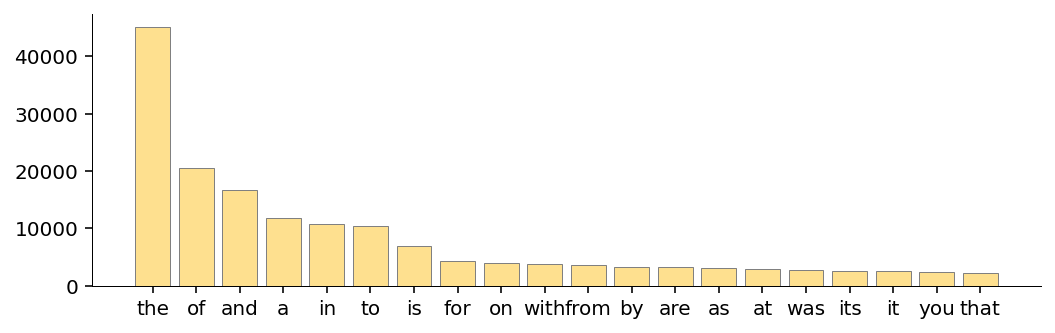

In [56]:
fig, ax = plt.subplots(1,1,figsize=(8.5,2.5))
barcontainers = ax.bar(x=wds, height=counts, color='#FEE08F')

# make it look good
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(.5)
ax.spines['bottom'].set_linewidth(.5)
for rect in barcontainers.patches:
    rect.set_linewidth(.5)
    rect.set_edgecolor('grey')

plt.show()

### Exercise: Extract person and place names from a document

**Warning**: On M1 macs, use `conda install spacy` not `pip install spacy`. See [issues with M1 and spaCy](https://github.com/explosion/spaCy/issues/7962).

Imagine trying to analyze text document. One of the things you might want to know is who is referenced within. This is actually an extremely hard problem to solve, but fortunately the people at [spaCy](https://spacy.io) have provided a library that does a very good job. All we have to do is put the glue around it. To install it, we need a library and their model of English:
 
```bash
$ pip install spacy
$ python -m spacy download en_core_web_sm
...
```

If we have a library that can identify the names within a document, the overall process is straightforward:

1. Load the text of a file into a string variable
2. Give the string to the spaCy library and ask it to analyze the text
3. Walk the list of names and add them to a set, which will create a unique collection

Our implementation starts with an import and loading of the English model:

In [1]:
import spacy
nlp = spacy.load("en_core_web_sm")

Next, we load the text of a sample file and give it to the `nlp` object that represents the English model:

In [2]:
with open(f"../data/berlitz1/WhatToJamaica.txt", "r") as f:
    s = f.read()
doc = nlp(s)

The `doc` object represents the analyze document and `doc.ents` represents a list of entities found during analysis. We can walk those entities with a for-each loop and, if the type of the entity is a person, we can add it to our unique set.  From the documentation of spaCy, I saw that `entity.label_` gives us the associated entity type and `entity.text` gives us the text of that entity:

In [3]:
names = set()
for entity in doc.ents:
    if entity.label_=="PERSON":
        names.add(entity.text)
sorted(names)[:20]

['Alfred Mitchell',
 'Andrew\n        Young',
 'Ann Parish',
 'Appleton Distillery',
 'Arawak',
 'Banana Boat Song',
 'Barrett',
 'Bettin',
 'Bligh',
 'Bob Marley',
 'Bounty',
 'Cage',
 'Canyon',
 'Charles Square',
 'Charlie',
 'Charlie Chaplin',
 'Cocktail',
 'Cornwall Barracks',
 'Coyaba',
 'Diving']

That does a reasonable job, but also seems to include a lot of organizations and locations. For fun, we can also look for organizations and geopolitical entities

In [4]:
orgs = set()
for entity in doc.ents:
    if entity.label_=="ORG" or entity.label_=="GPE":
        orgs.add(entity.text)
sorted(orgs)[:20]

['Air Force',
 'Amsterdam',
 'Anchovy',
 'Annie',
 'Annie Palmer',
 'Annie Palmers',
 'Arawak',
 'Arawak\n        Museum',
 'Archives and Records Office',
 'Belvedere Estate',
 'Bob Marley Museum',
 'Bogle',
 'Bond',
 'Booby Cay',
 'Boston',
 'Brimmer Hall Plantation',
 'Britain',
 'British Empire',
 'Calypso',
 'Canoe']